# A Data Scientist for a Professional Football Club

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error
pd.set_option('display.max_columns', 500)

%matplotlib inline

### Part 1

In [5]:
df = pd.read_csv('footballer_data.csv')

model_data = df.drop(['ID','club','club_logo','flag', 'nationality','photo','potential', 'birth_date'], axis = 'columns')

model_data['work_rate_att'] = pd.Categorical(model_data.work_rate_att, categories=['Low','Medium','High'])
model_data['work_rate_def'] = pd.Categorical(model_data.work_rate_def, categories=['Low','Medium','High'])
model_data['preferred_foot'] = pd.Categorical(model_data.preferred_foot, categories = ['Left','Right'])

model_data = pd.get_dummies(model_data, drop_first=True)
model_data.head()

,age,height_cm,weight_kg,overall,pac,sho,pas,dri,def,phy,international_reputation,skill_moves,weak_foot,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,work_rate_att_Medium,work_rate_att_High,work_rate_def_Medium,work_rate_def_High,preferred_foot_Right
0,32,185.0,80.0,94,90,93,82,90,33,80,5,5,4,85,94,88,83,88,91,81,76,77,93,89,91,89,96,63,94,95,92,80,92,63,29,95,85,85,95,22,31,0,1,0,0,1
1,30,170.0,72.0,93,89,90,86,96,26,61,5,4,4,77,95,71,88,85,97,89,90,87,95,92,87,90,95,95,85,68,73,59,88,48,22,93,90,78,96,13,28,1,0,1,0,0
2,25,175.0,68.0,92,92,84,79,95,30,60,5,5,5,75,89,62,81,83,96,81,84,75,95,94,90,96,88,82,80,61,78,53,77,56,36,90,80,81,92,21,24,0,1,1,0,1
3,30,182.0,86.0,92,82,90,79,87,42,81,5,4,4,77,94,77,83,88,86,86,84,64,91,88,77,86,93,60,87,69,89,80,86,78,41,92,84,85,83,30,45,0,1,1,0,1
4,31,193.0,92.0,92,91,90,95,89,60,91,5,1,4,15,13,25,55,11,30,14,11,59,48,58,61,52,85,35,25,78,44,83,16,29,30,12,70,47,70,10,10,1,0,1,0,1


### Part 2

C:\Users\mezzati\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


5.491330443481161
4.2620046165876735


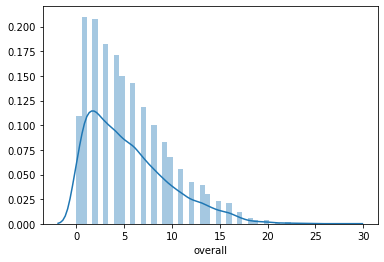

In [6]:
losses = abs(model_data.overall - model_data.overall.median())
sns.distplot(losses)
print(losses.mean())
print(losses.std())

x = np.random.normal(10,2,size = 1000)

### Part 3

In [7]:
test_size = round(((2*losses.std())/0.25)**2)

y = model_data.overall
X = model_data.drop('overall', axis = 'columns')

Xtrain, Xtest, ytrain, ytest = train_test_split(X,
                                                y, 
                                                test_size = test_size, 
                                                random_state = 0)

print(Xtrain.shape,Xtest.shape)

(16831, 45) (1163, 45)


### Part 4

In [9]:
model_pipeline = Pipeline([
    ('linear_regression', LinearRegression())
])

## Part 5

In [10]:
cv_score = cross_val_score(model_pipeline, Xtrain, ytrain, cv=5, scoring='neg_mean_absolute_error')

cv_score_mean = -cv_score.mean()
print(cv_score_mean)

1.9055815330889487


### Part 6

In [11]:
y_quad = model_data.overall
X_quad = model_data.assign(age2 = lambda x: x.age**2).drop('overall', axis = 'columns')

X_quad_train, X_quad_test, y_quad_train, y_quad_test = train_test_split(X_quad, y_quad, 
                                                                        test_size = test_size, 
                                                                        random_state = 0)

quadratic_model_pipeline = Pipeline([
    ('linear_regression', LinearRegression())
])

quad_cv_score = cross_val_score(quadratic_model_pipeline, 
                                X_quad_train, 
                                y_quad_train, 
                                cv = 5, 
                                scoring = 'neg_mean_absolute_error')

quad_cv_score_mean = -quad_cv_score.mean()
print(quad_cv_score_mean)

1.8872662605202266


### Part 7


In [12]:
model_pipeline_intxn = Pipeline([
    ('poly', PolynomialFeatures(include_bias = False)),
    ('linear_regression', LinearRegression())
])

cv_score = cross_val_score(model_pipeline_intxn, 
                           Xtrain, 
                           ytrain, 
                           cv = 5, 
                           scoring = 'neg_mean_absolute_error')

print(-cv_score.mean())

0.8861587663410997


### Part 8


Adding cubic terms will attain more powerful but also more complicated model with too many parameters which will also make it more prone to overfitting. Because the model will correspond too closely to training data and therefore it may fail to fit validation data and more importantly test data. In this case, the generalization error will be more than expected (in comarison with training error). So it can not predict future observation reliably.

### Part 9


0.8685278142596833
[0.80099928 0.93605635]


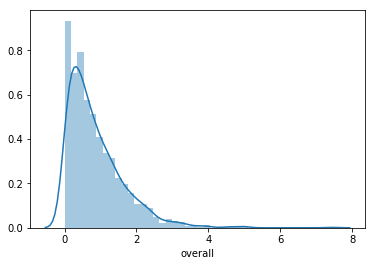

In [9]:
model_pipeline_intxn.fit(Xtrain, ytrain)

ypred = model_pipeline_intxn.predict(Xtest)

test_errors = ytest - ypred

generalization_error = mean_absolute_error(ytest, ypred)

test_ci = generalization_error + 1.96 * np.std(test_errors) / np.sqrt(len(test_errors)) * np.array([-1, 1])

sns.distplot(abs(test_errors))

print(generalization_error)
print(test_ci)

The test error is close to the CV error of the model which is a good thing. Because it depicts we could avoid overfitting by using a cross-validation technique. If we had used the training data to find the error of the models and choose the best one based on that, it would have probably posed the problem of overfitting and in that case the generalization error would be more.